### Big Mart Sales Prediction



Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



Train file: CSV containing the item outlet information with sales value



#### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.



#### About Dataset

We have train and test data set. Train data set has both input and output variable. You need to predict the sales for test data set.

Number of observations in Train set: 8523

Number of observations in Test set: 5681



#### Data Download

You can download the dataset from our Datahack Platform. Several Machine Learning and Deep Learning competitions are hosted on this platform. It gives you the following functionalities:

You can view and compare your score against that of other participants on the leaderboard.
You can also keep track of your submissions.


#### Approach to the Problem



- Pre-process the data: impute the missing values, normalize the variables. etc.
- Define the architecture of your model
- Since it is a regression problem, make sure that you use the 'linear' activation function in the output layer
- Train your model
- Do the same pre-processing steps on test set as you did for the training set
- Generate predictions for the test set using the trained model
- Save the predictions in a csv file (to check the format, refer to the sample submission file provided on the problem page)
- Submit your predictions on the problem page and check your rank on the leaderboard.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [114]:
train_df = pd.read_csv('train_XnW6LSF.csv')
test_df = pd.read_csv('test_FewQE9B.csv')

train_df['source']='train'
test_df['source']='test'
data = pd.concat([train_df, test_df],ignore_index=True)

In [115]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [116]:
# Dataframe of the train dataset- no of rows & columns
print(train_df.shape, test_df.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [117]:
# Checking the missing values in train df
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [118]:
# Checking datatypes of the varaibles 
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

 There are missing values in Item_weight and Outlet_Size

In [119]:
# Summary statistics of numerical data of columns present in DF
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [120]:
train_df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


### Hypothesis Generation 


### Demographics

Does outlet establishment year affect the sales? (Longer the establishment years, more the sales?)
Do outlets with higher capacity/sizes have increased sales?
Do Tier 1 outlets generate better sales?
Do outlet types like grocery stores have less sales?

### Store Level Hypothesis:
Do items with higher MRPs yield increased Outlet sales?
Do items weighing heavier generate more sales?

### Customer Behavior  

### Pscychographic
Do items with low fat content generate better sales?
Do soft drinks item type contribute to higher sales?
Does lower item visibility lead to lesser sales ?


### Store level hypothesis:
<b>City type:</b> Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

Population Density: Stores located in densely populated areas should have higher sales because of more demand.

Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place

Competitors: Stores having similar establishments nearby should have less sales because of more competition.

Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

Location: Stores located within popular marketplaces should have higher sales because of better access to customers.

Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.

Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

### Product Level Hypotheses:

Brand: Branded products should have higher sales because of higher trust in the customer.

Packaging: Products with good packaging can attract customers and sell more.

Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.

Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

Advertising: Better advertising of products in the store will should higher sales in most cases.

Promotional Offers: Products accompanied with attractive offers and discounts will sell more

### Customer level hypotheses:
Popularity: Items with more popularity get sold faster

Healthy: Items with less fat content are healthier and generate higher sales

## Exploratory Analysis: Univariate and Bivariate Analysis

In [121]:
# Seggregating and grouping columns with numerical datatypes
numerical_columns = train_df.select_dtypes(include=['int','float']).columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [122]:
# Seggregating numerical variables into groups for further analysis:

item_details = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
outlet_details = [ 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

In [123]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

### Univariate Analysis: Numerical variables

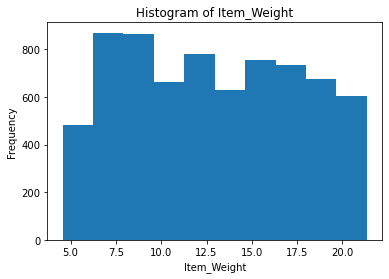

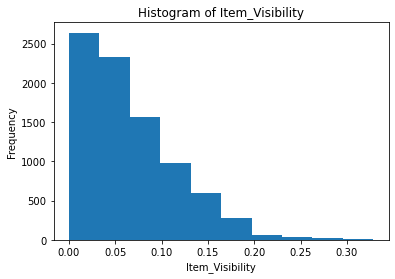

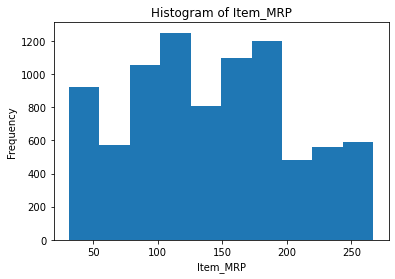

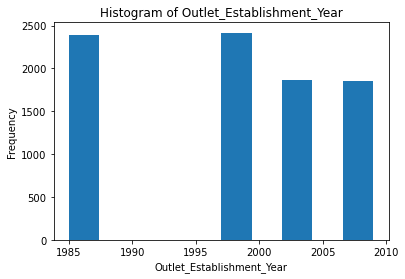

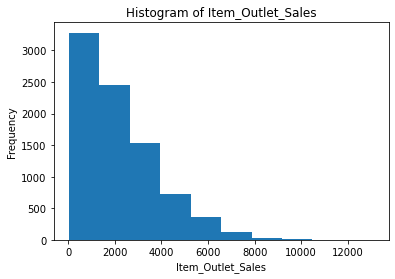

In [124]:
for i in numerical_columns:
    
    # Calculating descriptives of each variable
    minimum = train_df[i].min()
    maximum = train_df[i].max()
    ran = train_df[i].max()-train_df[i].min()
    mean = train_df[i].mean()
    median = train_df[i].median()
    std_dev = train_df[i].std()
    skew = train_df[i].skew()
    kurt = train_df[i].kurtosis()
    
    # calculating points of std deviation
    points = mean-std_dev, mean+std_dev
    
    # Plotting variables
    plt.hist(train_df[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(i))
    plt.show()

In [125]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

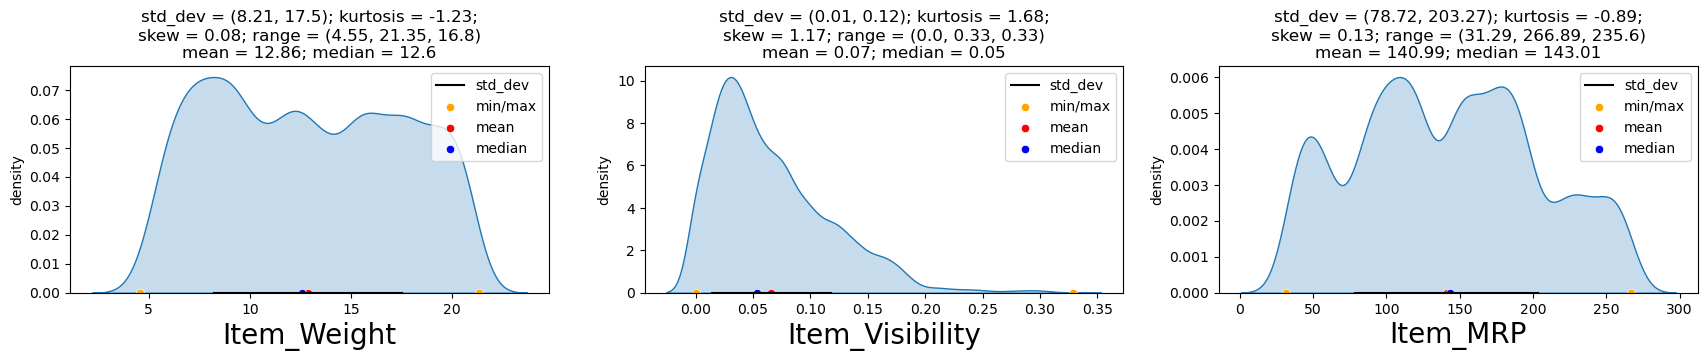

In [126]:
UVA_numeric(train_df, item_details)

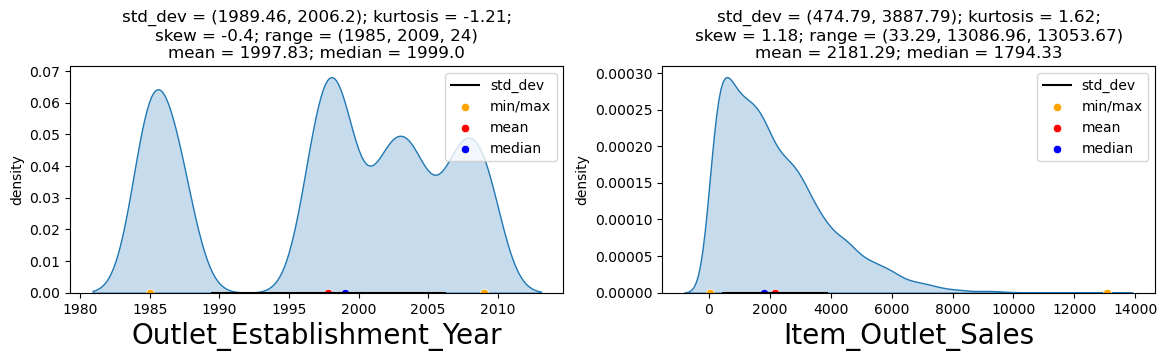

In [127]:
UVA_numeric(train_df, outlet_details)

Item_Visibility is right skewed. Ideally, skewness of a symmetric normal distribution is between +0.5 to -0.5

Item_Outlet_Sales is also right skewed. Since pattern of Item Visibility and sales are similar, there may be a stronger correlation between both.

There is spike between 1980-1990 and 1995-2000 in Outlet_establishment_year. SO a bivariate analysis is required at this point to analyze the variable

Item_weight and Item_MRP are not skewed. We could use box plots to check if there are any outliers and missing values can be treated later

In [128]:
# Summary statistics of numerical data of columns present in DF
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [129]:
categorical_columns = list(train_df.select_dtypes(include=['object']).columns)
categorical_columns.remove('Item_Identifier')

In [130]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    
    plt.subplot(1,size,j+1)
    # print(j)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

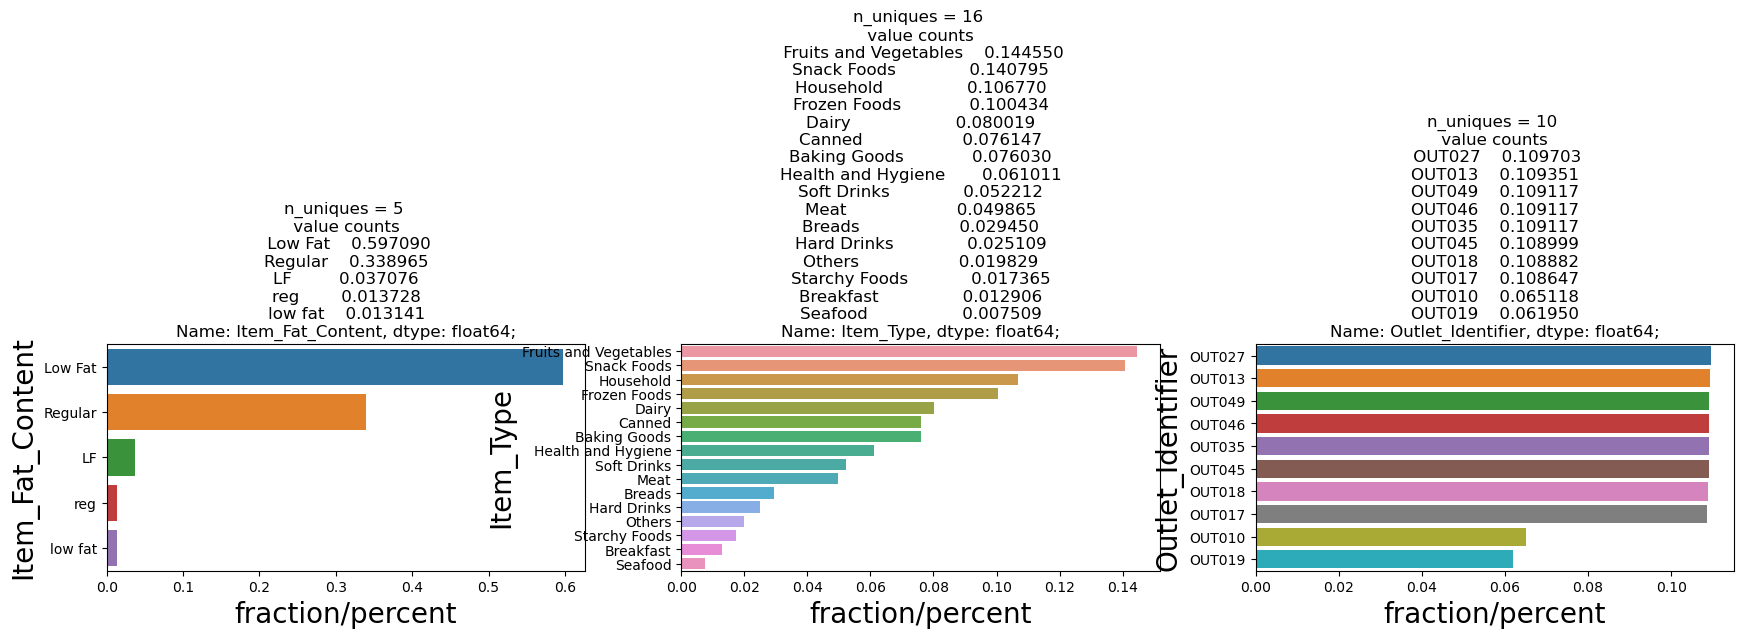

In [131]:
UVA_category(train_df, categorical_columns[:-4])

Item Fat content has many categories that belong to the same. More that 60% of the items belong to the Lowfact category, so that is probably what has contributed to increased sales.

The distribution of Item_type gradually decreases as we go down the list. Fruits & vegetables are the highest in number. This could explain the pattern of Item_sales. We can analyse it during Bivariate analysis

In [132]:
# Low Fat, LF and lolw fat all belong to same columns- so lets map- this is data redundancy

mapping = {
'Low Fat': 'Low Fat',
'LF': 'Low Fat',
'low fat': 'Low Fat',
'reg': 'Regular',
'Regular': 'Regular'}

In [133]:
data.Item_Fat_Content = data.Item_Fat_Content.map(mapping)

In [134]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [135]:
#Redefining train and test after change

train_df = data[data.source=='train']
test_df = data[data.source=='test']

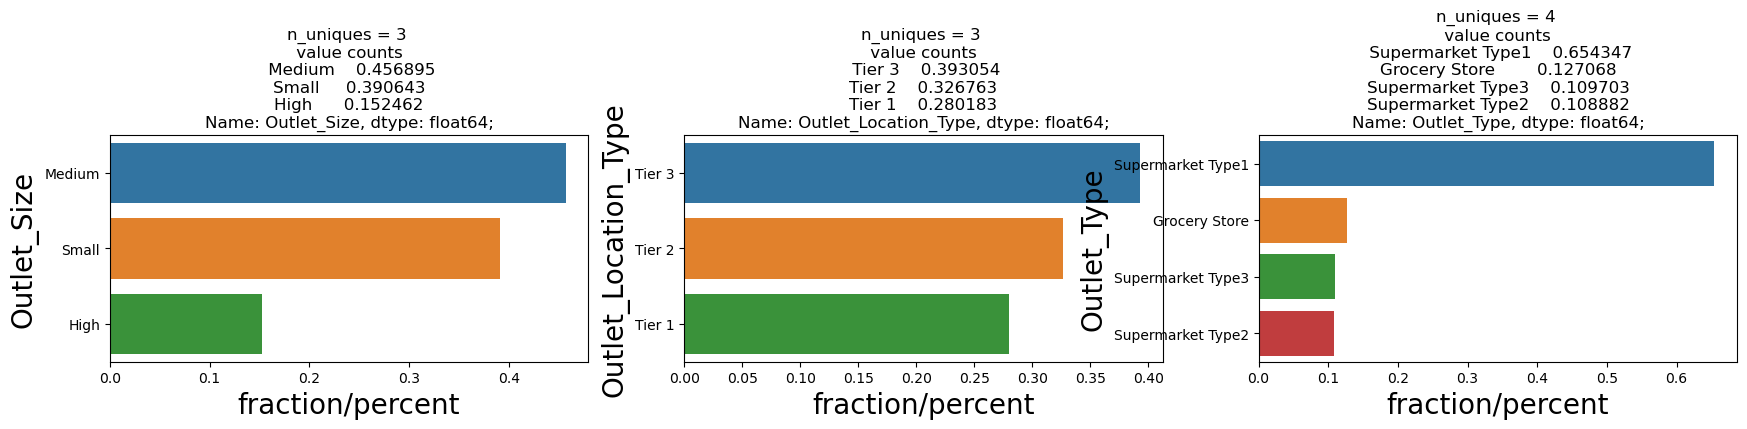

In [136]:
UVA_category(train_df, categorical_columns[-4:-1])

There are more no of outlets that are medium sized with supermarket type 1. 

Lets check correlation between these to analyze further

## Outlier Detection, Missing Values

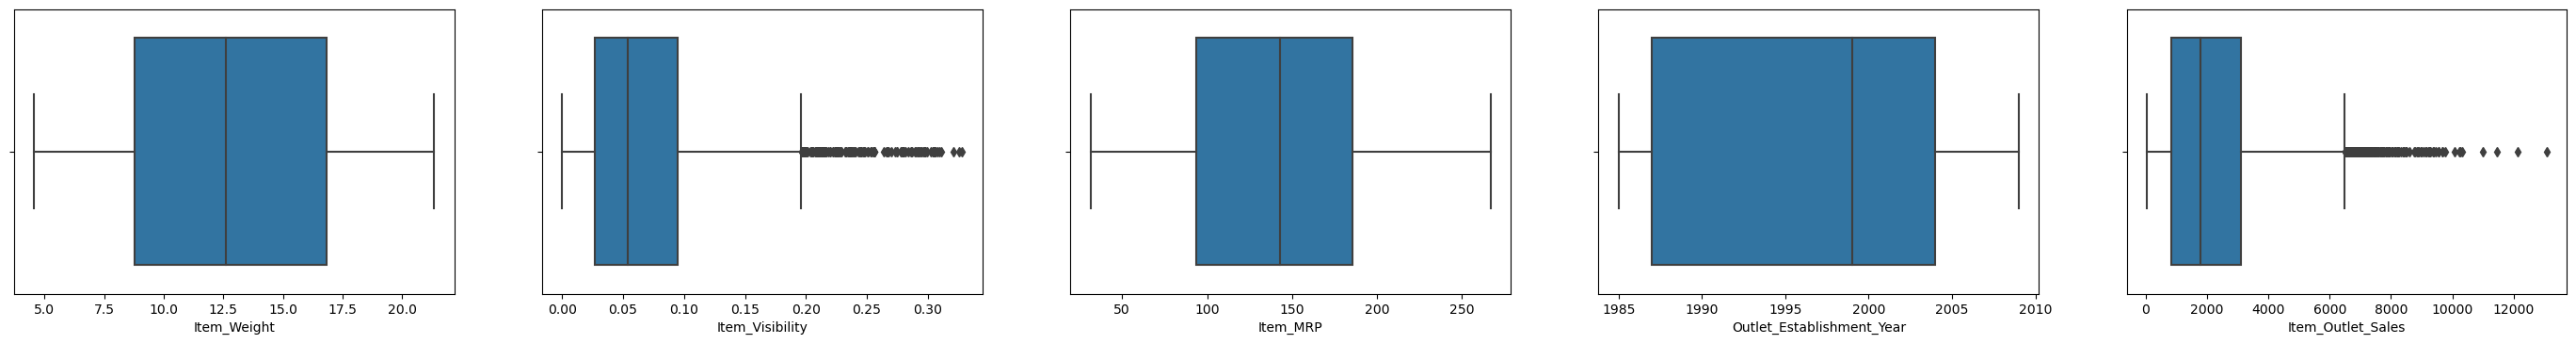

In [137]:

size = len(numerical_columns)
plt.figure(figsize = (7*size,4), dpi = 100)

for j,i in enumerate(numerical_columns):
    plt.subplot(1,size,j+1)
    sns.boxplot(train_df[i], orient="v")

We can see that there are more outliers in Item_Visibility and Item_Outlet_Sale. This can explain the right skewness of these two settings

If use log transformation to change the pattern (Skewness) of the data and to remove the outliers

In [138]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [139]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) ).T
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode.loc[x])
print(sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium

Orignal #missing: 4016
0


In [140]:
#Redefining train and test after change

train_df = data[data.source=='train']
test_df = data[data.source=='test']

In [141]:
train_df.Outlet_Size.mode()

0    Small
dtype: object

In [142]:
train_df.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [143]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

## Bivariate Analysis: 

In [144]:
# isolating numerical datatypes
numerical = train_df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

# calculating correlation
correlation = train_df.dropna().corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009661,0.026172,-0.012823,0.013261
Item_Visibility,-0.009661,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.026172,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.012823,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013261,-0.128625,0.567574,-0.049135,1.000000


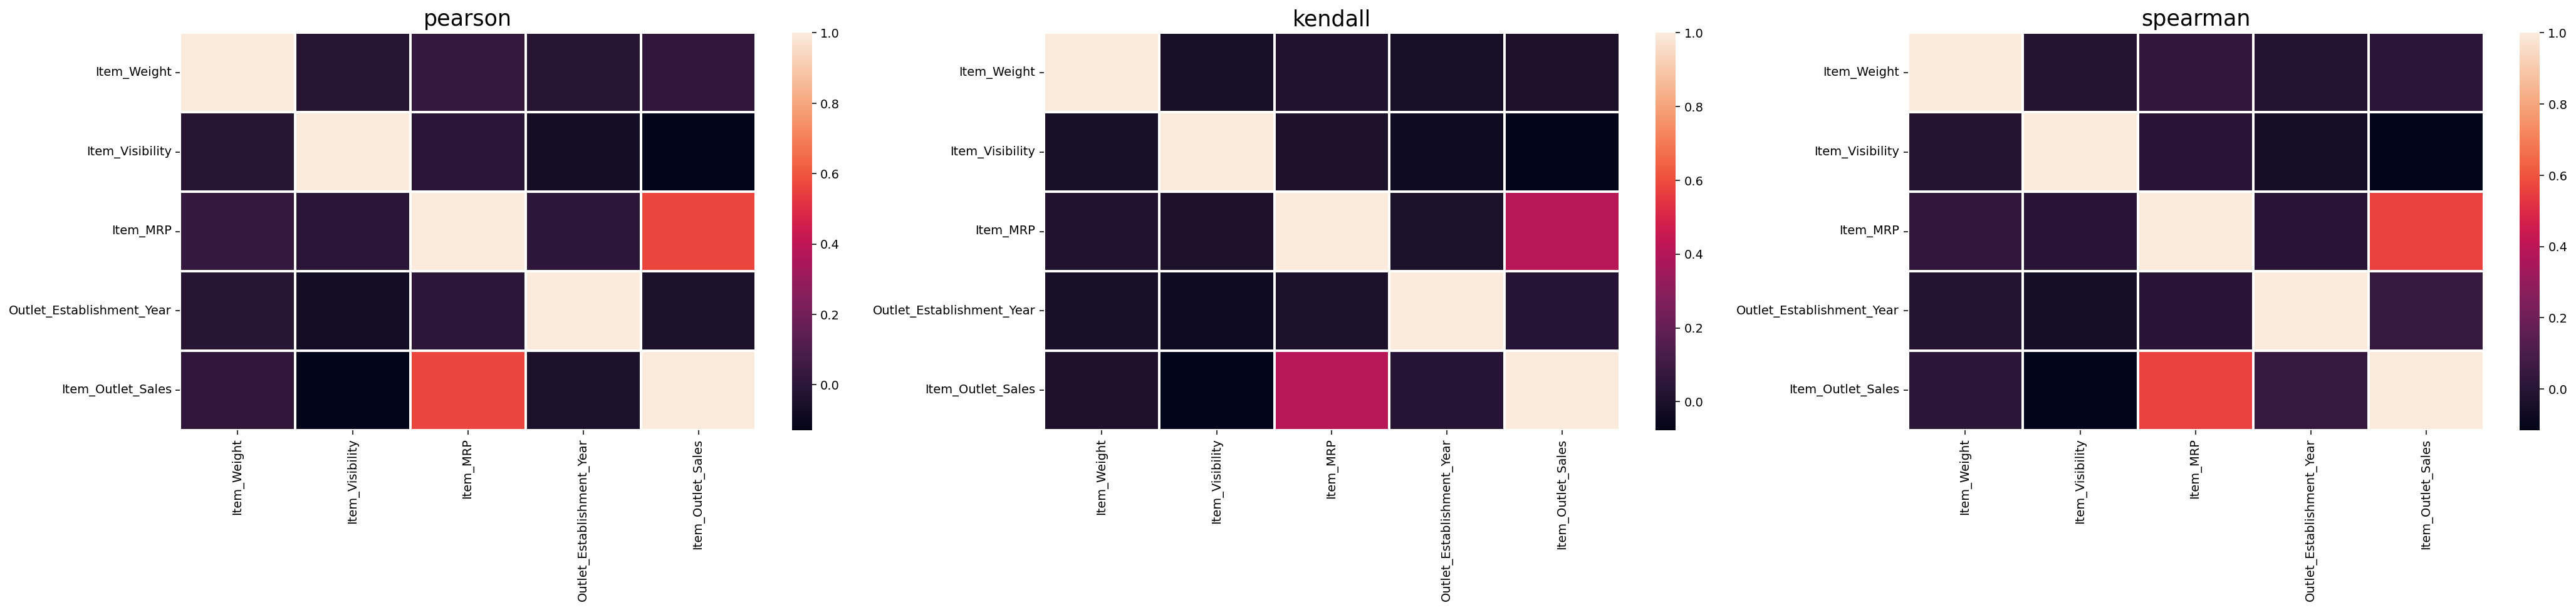

In [145]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

- There is a strong correlation between MRP and Sales, customers could be purchasing the Items with lesser or higher MRP more or less
- Correlation of all other variables with Slaes are neglibile

<Figure size 840x560 with 0 Axes>

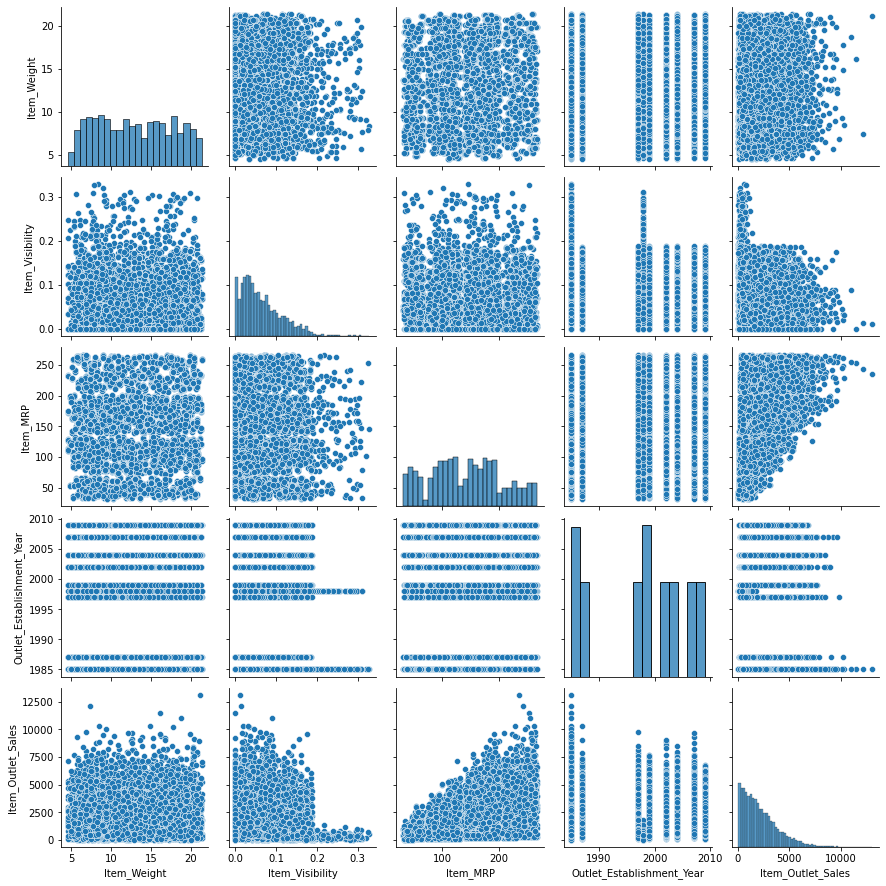

In [146]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical)

## Preprocessing, Feature Creation

In [147]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [148]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [149]:
data['Outlet_Year'] = (2013 - data.Outlet_Establishment_Year)

In [150]:
data['Outlet_Year'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Year, dtype: float64

In [151]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [152]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [153]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [154]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [155]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Year                    int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [156]:
#Redefining train and test after change
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
train_df = data[data.source=='train']
test_df = data[data.source=='test']

test_df.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train_df.drop(['source'],axis=1,inplace=True)

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor

In [158]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring="neg_mean_squared_error")
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.39 | Min - 1075 | Max - 1210


<AxesSubplot:title={'center':'Model Coefficients'}>

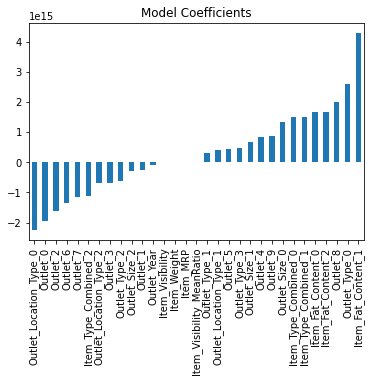

In [159]:
predictors = [x for x in train_df.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train_df, test_df, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


<AxesSubplot:title={'center':'Model Coefficients'}>

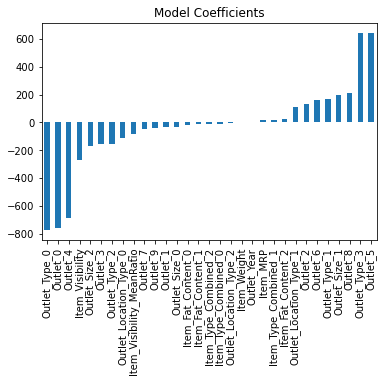

In [161]:
predictors = [x for x in train_df.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train_df, test_df, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


<AxesSubplot:title={'center':'Feature Importances'}>

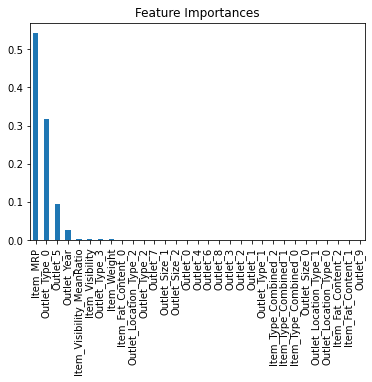

In [162]:
predictors = [x for x in train_df.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train_df, test_df, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')